## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [9]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data

784594


"n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg\nn00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg\nn00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg\nn00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg\nn00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg\nn00015388_671\thttp://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg\nn00015388_686

In [10]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
print(data[0]+" "+data[1])

9996
n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg


In [18]:
dictdata = {}
picname = []
picurl = []
for x in data:
    parsed = x.split('\t')
    if(len(parsed) > 1):
        picname.append(parsed[0])
        picurl.append(parsed[1])
        
dictdata['pic_name']= picname
dictdata['pic_url']= picurl
dictdata

{'pic_name': ['n00015388_157',
  'n00015388_238',
  'n00015388_304',
  'n00015388_327',
  'n00015388_355',
  'n00015388_373',
  'n00015388_379',
  'n00015388_388',
  'n00015388_442',
  'n00015388_474',
  'n00015388_514',
  'n00015388_671',
  'n00015388_686',
  'n00015388_706',
  'n00015388_725',
  'n00015388_758',
  'n00015388_841',
  'n00015388_842',
  'n00015388_1087',
  'n00015388_1145',
  'n00015388_1184',
  'n00015388_1191',
  'n00015388_1224',
  'n00015388_1457',
  'n00015388_1476',
  'n00015388_1530',
  'n00015388_1574',
  'n00015388_1608',
  'n00015388_1640',
  'n00015388_1688',
  'n00015388_1705',
  'n00015388_1832',
  'n00015388_1835',
  'n00015388_1865',
  'n00015388_1888',
  'n00015388_1995',
  'n00015388_1997',
  'n00015388_2003',
  'n00015388_2004',
  'n00015388_2110',
  'n00015388_2122',
  'n00015388_2246',
  'n00015388_2263',
  'n00015388_2286',
  'n00015388_2423',
  'n00015388_2436',
  'n00015388_2506',
  'n00015388_2544',
  'n00015388_2594',
  'n00015388_2605',
  'n00

## 將 txt 轉成 pandas dataframe

In [19]:
import pandas as pd
 
df = pd.DataFrame(dictdata)
df.head()

,pic_name,pic_url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [24]:
df.loc[0]['pic_url']

'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

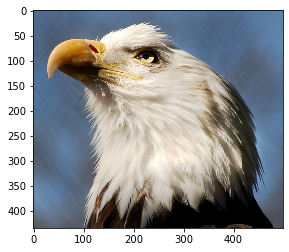

In [80]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0]['pic_url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [76]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for geturl in url_list:
             
        try:
            response = requests.get(geturl)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except:
            pass
    return img_list
    

In [77]:
df.loc[0:5]['pic_url']

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
5    http://img172.imageshack.us/img172/4606/napo03...
Name: pic_url, dtype: object

Total images that we got: 4 


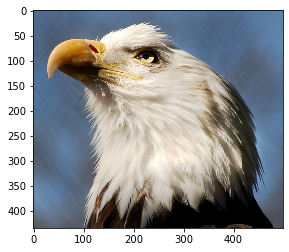

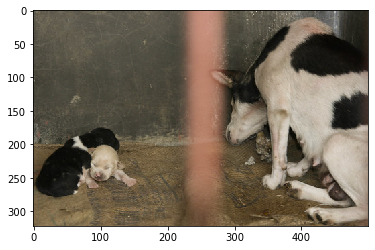

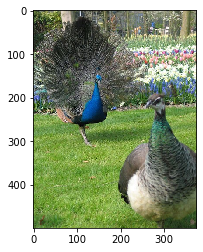

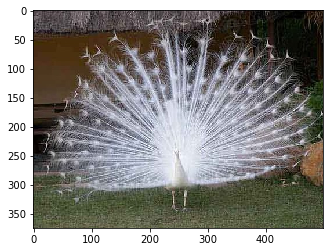

In [79]:
result = img2arr_fromURLs(df.loc[0:5]['pic_url'])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()